****************************Auto MPG Data Set**********************************************

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

We will be solving this probelm by using linear Regression and PolynomialFeatures (Convert original features into higher order terms)

In [1]:
# Let's import all necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read data file using Pandas  
mpg=pd.read_csv('auto-mpg.csv')

In [3]:
# Let's look few rows of the dataset 
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# Let's look bottom rows of the dataset
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
# Let's see the shape
mpg.shape

(398, 9)

In [6]:
# Let's explore few basic statistics of the dataset using describe function 
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# Let's see null values 
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
# Lets understand data type by using info function. 
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
mpg.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
mpg = mpg[mpg.horsepower != '?']

In [12]:
# Checking for ? in dataset 
'?' in mpg

False

In [13]:
mpg.horsepower = mpg.horsepower.astype('float')
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

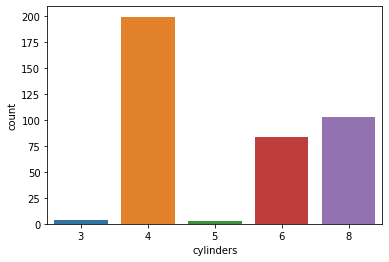

In [14]:
# Let's see the distribution of cylinders counts 
sns.countplot(mpg.cylinders,data=mpg)
plt.show() 

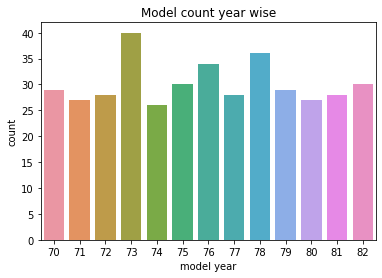

In [15]:
# Visualize the model years 
sns.countplot(mpg['model year'])
plt.title('Model count year wise')
plt.show()

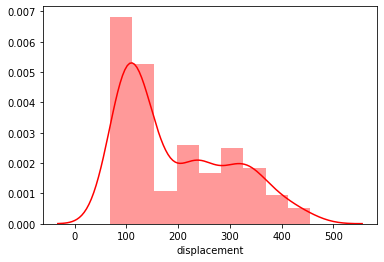

In [16]:
#Let's see distribution of the Displacement of automobile 
sns.distplot(mpg.displacement, color='r')
plt.show()

In [17]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

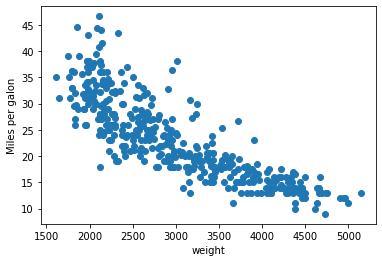

In [18]:
plt.scatter(mpg['weight'],mpg['mpg'])
plt.xlabel("weight")
plt.ylabel("Miles per galon")
plt.show() # As weight increasing mgp reducing 

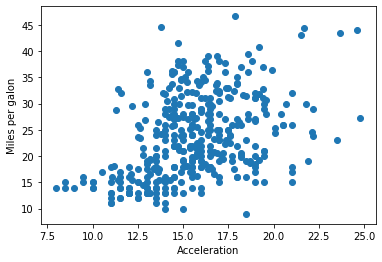

In [19]:
plt.scatter(mpg['acceleration'],mpg['mpg'])
plt.xlabel("Acceleration")
plt.ylabel("Miles per galon")
plt.show() # More the acceleration more the mpg

<Figure size 1440x720 with 0 Axes>

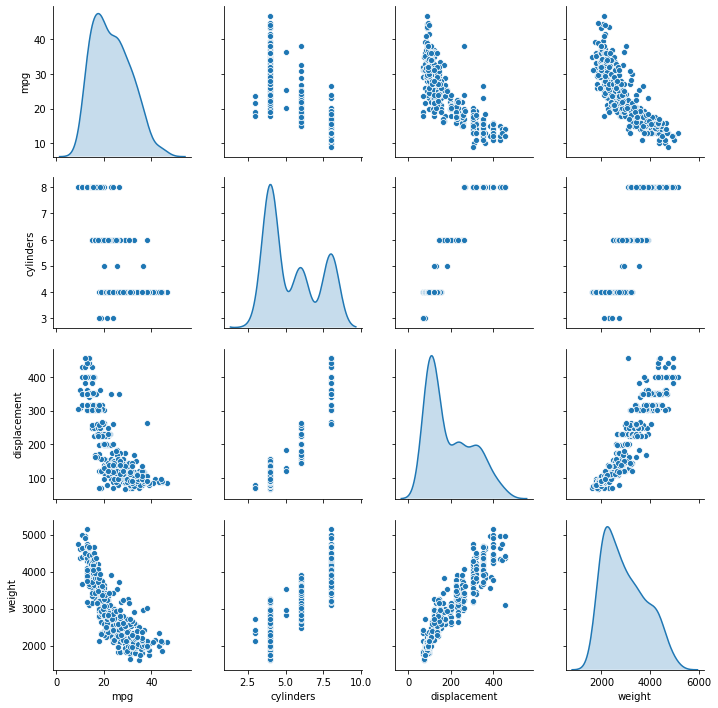

In [20]:
plt.figure(figsize=(20,10))
sns.pairplot(mpg[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")
plt.show()

We will split the regressions for different origin using lmplot() function which is used to visualize a linear relationship as determined through regression.

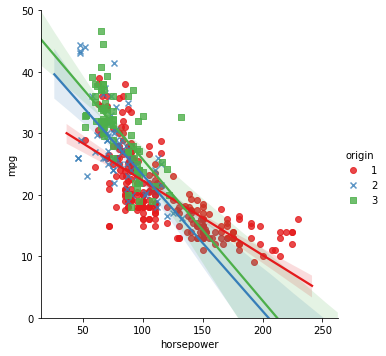

In [21]:
hp = 'horsepower'
plot = sns.lmplot(hp,'mpg',data=mpg,hue='origin',  markers=["o", "x", "s"], palette="Set1")
plot.set(ylim = (0,50))

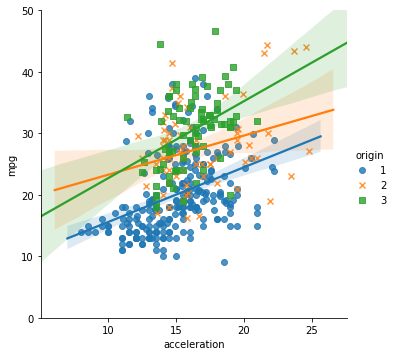

In [22]:
acc = 'acceleration'
plot = sns.lmplot(acc,'mpg',data=mpg,hue='origin', markers=["o", "x", "s"])
plot.set(ylim = (0,50))

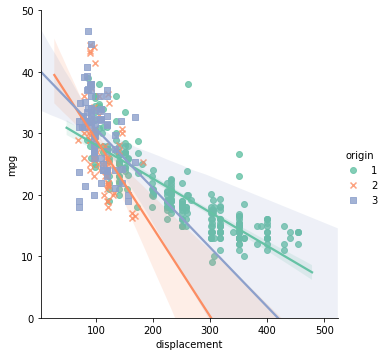

In [23]:
acc = 'displacement'
plot = sns.lmplot(acc,'mpg',data=mpg,hue='origin', markers=["o", "x", "s"],  palette="Set2")
plot.set(ylim = (0,50))

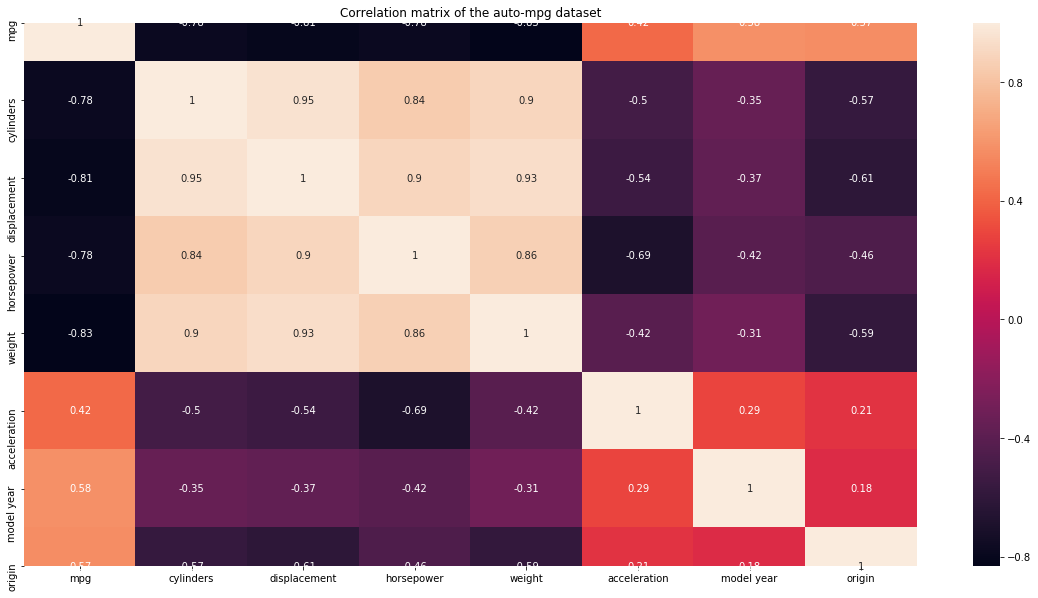

In [24]:
# Let's plot correlation matrix
plt.figure(figsize=(20,10))
corr_=mpg.corr()
g=sns.heatmap(corr_,annot=True)
g.set(title='Correlation matrix of the auto-mpg dataset')
plt.show() 

In [25]:
# Lets check skewness in the dataset
mpg=mpg.drop(['car name'], axis=1)
mpg.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [26]:
# Lets treat the skewness in the data
from scipy import stats
z = np.abs(stats.zscore(mpg))
print(z)

[[0.69863841 1.48394702 1.07728956 ... 1.285258   1.62531533 0.71664105]
 [1.08349824 1.48394702 1.48873169 ... 1.46672362 1.62531533 0.71664105]
 [0.69863841 1.48394702 1.1825422  ... 1.64818924 1.62531533 0.71664105]
 ...
 [1.09737414 0.86401356 0.56847897 ... 1.4304305  1.63640964 0.71664105]
 [0.5842277  0.86401356 0.7120053  ... 1.11008813 1.63640964 0.71664105]
 [0.96908753 0.86401356 0.72157372 ... 1.40043312 1.63640964 0.71664105]]


In [27]:
threshold = 3
print(np.where(z > 3))

(array([  6,   8,  13,  94, 115, 297, 388], dtype=int64), array([3, 3, 3, 3, 3, 5, 5], dtype=int64))


In [28]:
mpg= mpg[(z < 3)]
mpg.shape

(3129, 8)

In [29]:
# Lets divide data set into dependent and independent variables 
features=mpg.drop(['mpg'], axis=1)
target=mpg['mpg']
print(features.shape)
print(target.shape)

(3129, 7)
(3129,)


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_ = sc.fit_transform(features)

In [31]:
# Reshape the target variable 
target_=mpg['mpg'].values.reshape(-1,1)
print(target_.shape)

(3129, 1)


In [32]:
# Import necessary library for model training and evaluation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
# Lets split the training and testing set 
x_train, x_test, y_train, y_test = train_test_split(feature_, target_ ,random_state =0,test_size=0.20)

In [34]:
# Lets train the linear regression model 
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Lets evaluate the model 
y_pred= lr.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )

RMSE is:  3.2932020947554395
r2_score is:  0.8328981439560011


In [36]:
# Evaluate cross validation score to find out the overfitting or underfitting issues while training 
kfold = KFold(n_splits=10, random_state=52)
cv_result = cross_val_score(LinearRegression(),x_train,y_train, cv = kfold, scoring = "r2")
print("Cross Validation score for 5 iternations: {}%".format (cv_result.mean()))

Cross Validation score for 5 iternations: 0.8143537260369408%


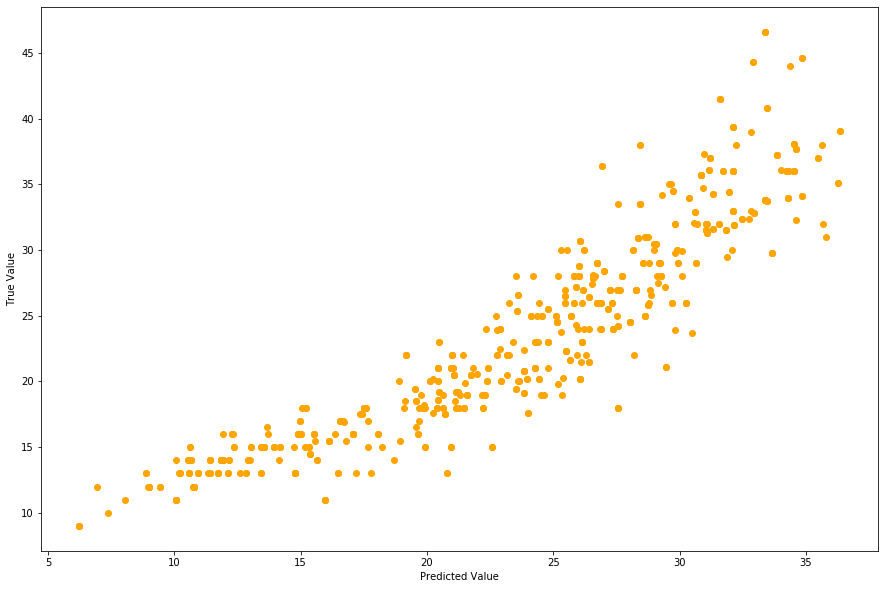

In [37]:
 #Plot the distribution of the Preedicted and True
plt.figure(figsize=(15,10))   
# plot the model
plt.scatter(y_pred, y_test, color='orange')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

# Polynomial Feature 

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn.Then we will train the model using Linear Regression.



Let’s define a function which will transform the original features into polynomial features of a given degree and then apply Linear Regression on it.

In [38]:
def create_polynomial_regression_model(degree):
    
    print("Creates a polynomial regression model for the given degree")

    poly_features = PolynomialFeatures(degree=degree)
  
    # transforms the existing features to higher degree features.
    x_train_poly = poly_features.fit_transform(x_train)
  
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(x_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
  
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
  
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
  
    print("\n")
  
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
     #Plot the distribution of the Predicted and True
    plt.figure(figsize=(15,10)) 
    plt.scatter(y_test_predict, y_test, color='green')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()

Creates a polynomial regression model for the given degree
The model performance for the training set
-------------------------------------------
RMSE of training set is 3.290152933321411
R2 score of training set is 0.8181889270319743


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.29320209475544
R2 score of test set is 0.832898143956001


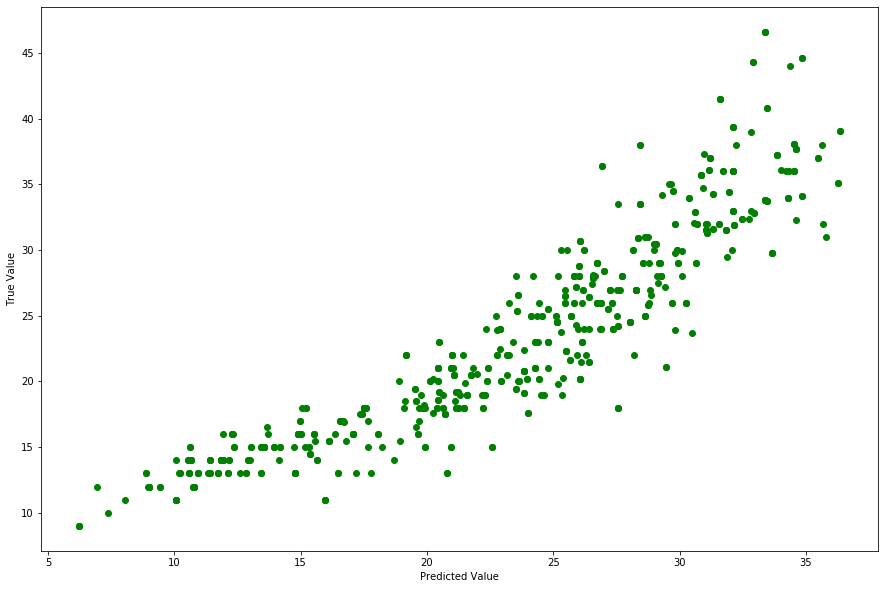

In [39]:
#Let's call above function with degree of 1 
create_polynomial_regression_model(1)

Creates a polynomial regression model for the given degree
The model performance for the training set
-------------------------------------------
RMSE of training set is 2.5020228182371484
R2 score of training set is 0.8948593418280711


The model performance for the test set
-------------------------------------------
RMSE of test set is 2.628512205281506
R2 score of test set is 0.8935453825306532


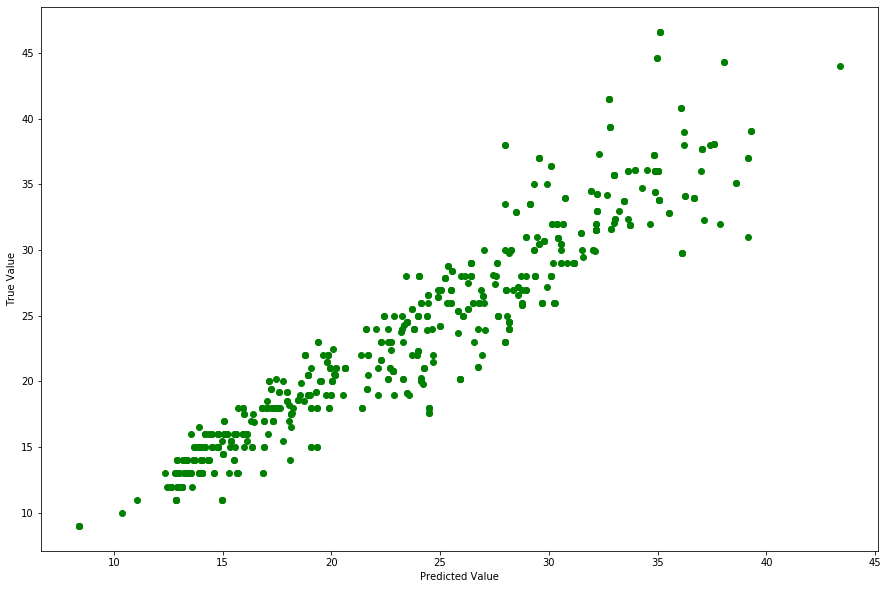

In [40]:
#Let's call above function with degree of 2
create_polynomial_regression_model(2)

We can see that RMSE has decreased and R²-score has increased as compared to the linear regression when we have used ploy degree 2.

Creates a polynomial regression model for the given degree
The model performance for the training set
-------------------------------------------
RMSE of training set is 1.893783578807384
R2 score of training set is 0.9397650086973346


The model performance for the test set
-------------------------------------------
RMSE of test set is 2.0514132999659562
R2 score of test set is 0.935158830180892


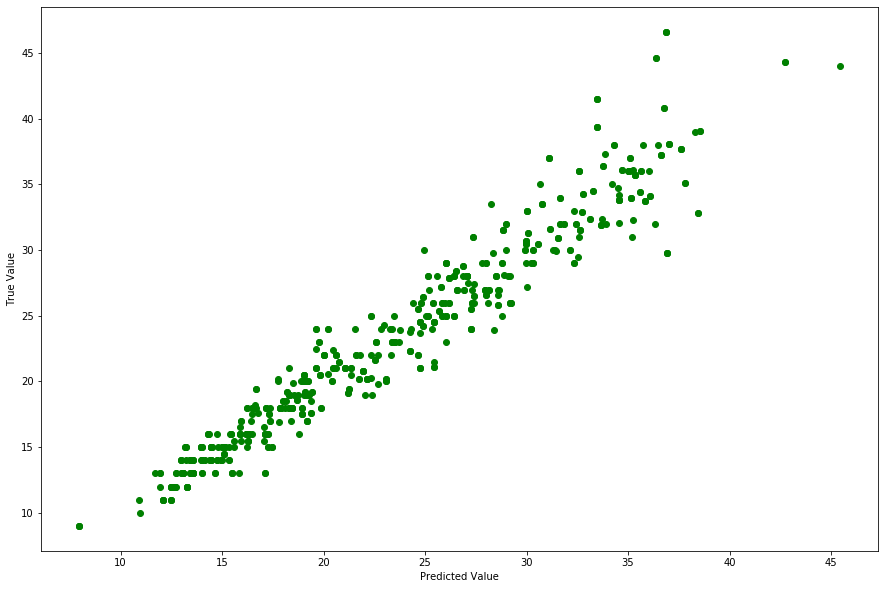

In [41]:
#Let's call above function with degree of 3 (cubic)
create_polynomial_regression_model(3)

We can see that RMSE has decreased and R²-score has increased further when we have used ploy degree 3.

Creates a polynomial regression model for the given degree
The model performance for the training set
-------------------------------------------
RMSE of training set is 0.976089578827892
R2 score of training set is 0.9839982488850476


The model performance for the test set
-------------------------------------------
RMSE of test set is 1.1772854091856335
R2 score of test set is 0.9786445842414854


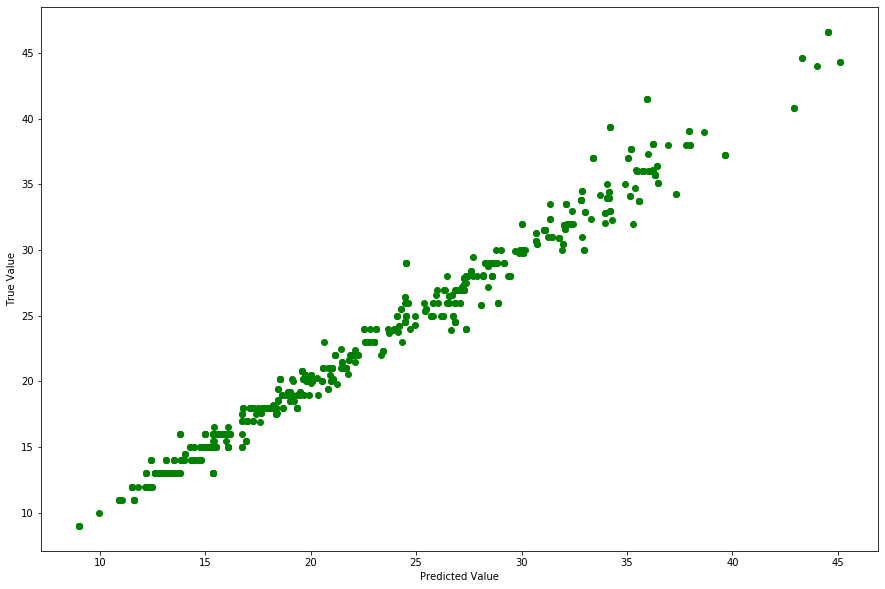

In [42]:
#Let's call above function with degree of 4 
create_polynomial_regression_model(4)

Creates a polynomial regression model for the given degree
The model performance for the training set
-------------------------------------------
RMSE of training set is 2.0991196288354886e-11
R2 score of training set is 1.0


The model performance for the test set
-------------------------------------------
RMSE of test set is 2.1523937197433234e-11
R2 score of test set is 1.0


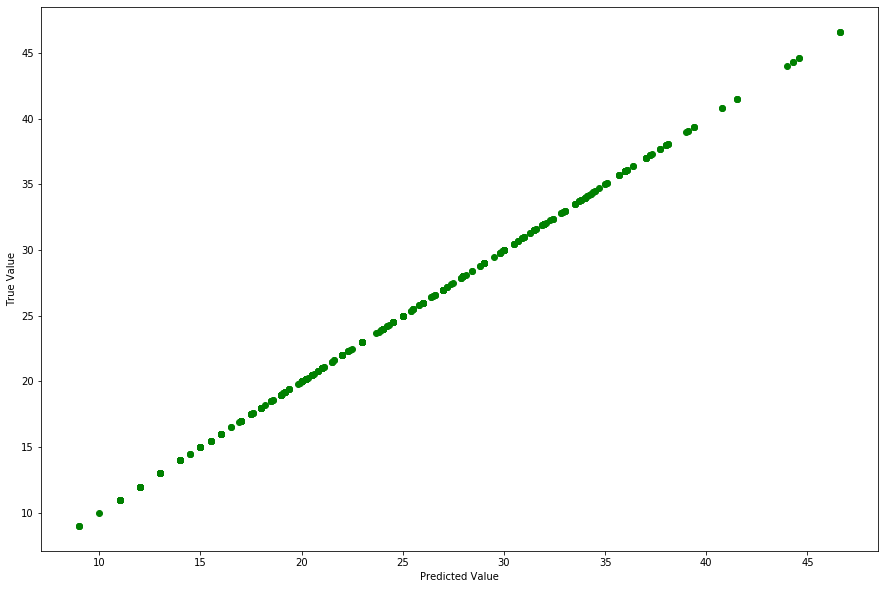

In [43]:
#Let's call above function with degree of 10
create_polynomial_regression_model(10)

For the poly degree n= 2,3,4 models have shows increased RMSE on test data set which indicates probelem of overfitting. When we have used ploy 2 and trained LinearRegression RMSE has increased by 0.12 which not a serious issue this can be deal with adding more data or attempt regularization methods to handle this. 

# Ridge and Lasso

In [44]:
from sklearn.linear_model import Ridge, Lasso

Lets define a function for Ridge which can be used for Lasso too. By simply replacing model.

In [45]:
def create_polynomial_regularization_model(degree):
    
    print("Creates a polynomial regression model for the given degree")

    poly_features = PolynomialFeatures(degree=degree)
  
    # transforms the existing features to higher degree features.
    x_train_poly = poly_features.fit_transform(x_train)
  
    # fit the transformed features to Ridge Regression
    poly_model = Ridge(alpha = 2)
    poly_model.fit(x_train_poly, y_train)
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(x_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
  
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
  
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
  
    print("\n")
  
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
     #Plot the distribution of the Predicted and True
    plt.figure(figsize=(15,10)) 
    plt.scatter(y_test_predict, y_test, color='blue')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()

Creates a polynomial regression model for the given degree
The model performance for the training set
-------------------------------------------
RMSE of training set is 2.5026464075475285
R2 score of training set is 0.8948069260303342


The model performance for the test set
-------------------------------------------
RMSE of test set is 2.6269453335463493
R2 score of test set is 0.8936722611621477


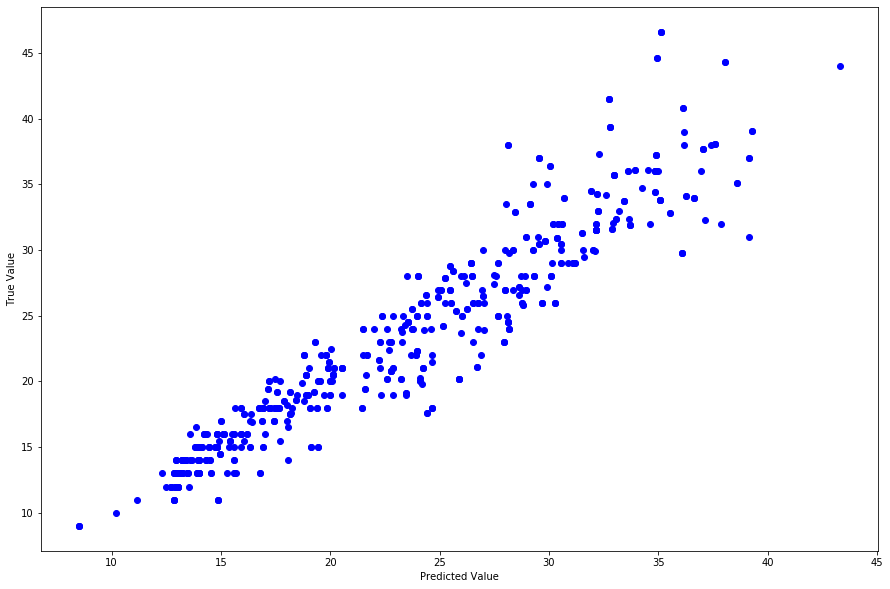

In [46]:
#Let's call above function with degree of 2
create_polynomial_regularization_model(2)

After applying Ridge with poly degree 2 we didn't find improvement in the test RMSE value.

In this we have applied linear regression and transform features using polynominal features of various degree. In this we also attempted to solve overfitting problem with regularization techniques. Out of all Linear Regression with degree 2 is performing better for the given dataset.